# Loading Data

In [35]:
!pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [62]:
from sklearn.model_selection import train_test_split
import numpy as np
import tqdm
import gensim
import random
import copy
import unicodedata
from bs4 import BeautifulSoup
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import nltk


In [37]:
from datasets import load_dataset

dataset = load_dataset("emotone_ar")

Generating train split:   0%|          | 0/10065 [00:00<?, ? examples/s]

Dataset emotone_ar downloaded and prepared to /root/.cache/huggingface/datasets/emotone_ar/default/0.0.0/36bfa7e8bdf640ccb3d5701933cfde2fa7051f22881cfab2962122771d32c430. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 10065
    })
})

In [39]:
import pandas as pd
Data= pd.DataFrame(dataset['train'])

In [40]:
Data.head()

,tweet,label
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1
2,كتنا نيله ف حظنا الهباب xD,3
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0


In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10065 entries, 0 to 10064
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   10065 non-null  object
 1   label   10065 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.4+ KB


In [42]:
Data['label'].value_counts()

0    1550
1    1444
2    1281
3    1256
4    1220
7    1207
5    1062
6    1045
Name: label, dtype: int64

In [43]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}


# EMOJIS

In [44]:
!pip install demoji

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.0 MB/s eta 0:00:00


In [45]:
import demoji
import re

def extract_emojis(tweet):
  return demoji.findall(tweet)
def extract_emoticons(text):
  emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
  emoticons = re.findall(emoticon_pattern, text)
  return emoticons

In [46]:
all_emojis = []
all_emoticons = []

for text in Data['tweet']:
    emojis = extract_emojis(text)
    emoticons = extract_emoticons(text)
    all_emojis.extend(emojis)
    all_emoticons.extend(emoticons)

print("All Emojis:", set(all_emojis))
print("All Emoticons:", set(all_emoticons))


All Emojis: {'🍂', '✏️', '👏🏻', '🔫', '👎🏻', '👈', '😰', '😨', '🇩🇿', '😖', '👌🏻', '✏', '♦️', '👑', '☂', '💦', '👌', '💌', '⚽', '🙏🏻', '😐', '⁉️', '💘', '😱', '💐', '📝', '🏃', '💤', '💪', '👐', '😡', '😦', '😌', '😩', '🎥', '🔪', '😇', '➿', '☁️', '🎉', '😿', '☠️', '😠', '👊🏽', '💚', '🏊', '✍🏻', '🚶🏽', '😳', '😻', '❤️', '💎', '💓', '💪🏼', '💡', '🙄', '♨', '🇧🇭', '💃', '🏃🏼', '🍷', '📍', '😘', '🍔', '🙇', '🇮🇶', '✌️', '🌞', '😷', '🔐', '😆', '◾', '⚜', '🙏🏼', '🍳', '👻', '🇯🇴', '👊🏿', '©', '🌝', '🎾', '🙋', '🎼', '😀', '🌾', '👼', '👧', '😴', '🌸', '✊', '🐤', '🔑', '👉', '🙈', '😂', '😜', '☔', '👯', '✔', '😫', '😙', '😅', '🙃', '👍🏻', '🌚', '2️⃣', '🗣', '👏', '🐰', '💜', '🍟', '💂🏿', '😃', '✋', '💕', '😥', '😪', '❤', '💟', '❣', '🤔', '👣', '👏🏼', '😎', '😯', '🗨', '😞', '🌟', '✈️', '💝', '💔', '☘', '🎈', '😈', '™', '☹️', '☝', '💉', '✖', '✌', '💫', '🚶🏾\u200d♀️', '🔥', 'ℹ', '‼️', '🙊', '😛', '🙏', '🌹', '📮', '⚠️', '🚬', '👏🏽', '😊', '‼', '✒', '🙆🏻', '👊', '😭', '⭕', '🇪🇬', '🎶', '🙌🏼', '👵🏽', '😒', '✨', '💗', '🌿', '😟', '🐓', '💩', '👊🏼', '😧', '🎵', '👋', '🙂', '💪🏽', '👎', '😏', '😲', '🕶', '🍃', '🙁', '🙌', '😕', '👽', '😬', '📩', 

In [47]:
all_emojis= set(all_emojis)
all_emoticons= set(all_emoticons)
print("len Emojis:", len(all_emojis))
print("All Emojis:", all_emojis)
print("len Emoticons:", len(all_emoticons))
print("All Emoticons:", all_emoticons)


len Emojis: 276
All Emojis: {'🍂', '✏️', '👏🏻', '🔫', '👎🏻', '👈', '😰', '😨', '🇩🇿', '😖', '👌🏻', '✏', '♦️', '👑', '☂', '💦', '👌', '💌', '⚽', '🙏🏻', '😐', '⁉️', '💘', '😱', '💐', '📝', '🏃', '💤', '💪', '👐', '😡', '😦', '😌', '😩', '🎥', '🔪', '😇', '➿', '☁️', '🎉', '😿', '☠️', '😠', '👊🏽', '💚', '🏊', '✍🏻', '🚶🏽', '😳', '😻', '❤️', '💎', '💓', '💪🏼', '💡', '🙄', '♨', '🇧🇭', '💃', '🏃🏼', '🍷', '📍', '😘', '🍔', '🙇', '🇮🇶', '✌️', '🌞', '😷', '🔐', '😆', '◾', '⚜', '🙏🏼', '🍳', '👻', '🇯🇴', '👊🏿', '©', '🌝', '🎾', '🙋', '🎼', '😀', '🌾', '👼', '👧', '😴', '🌸', '✊', '🐤', '🔑', '👉', '🙈', '😂', '😜', '☔', '👯', '✔', '😫', '😙', '😅', '🙃', '👍🏻', '🌚', '2️⃣', '🗣', '👏', '🐰', '💜', '🍟', '💂🏿', '😃', '✋', '💕', '😥', '😪', '❤', '💟', '❣', '🤔', '👣', '👏🏼', '😎', '😯', '🗨', '😞', '🌟', '✈️', '💝', '💔', '☘', '🎈', '😈', '™', '☹️', '☝', '💉', '✖', '✌', '💫', '🚶🏾\u200d♀️', '🔥', 'ℹ', '‼️', '🙊', '😛', '🙏', '🌹', '📮', '⚠️', '🚬', '👏🏽', '😊', '‼', '✒', '🙆🏻', '👊', '😭', '⭕', '🇪🇬', '🎶', '🙌🏼', '👵🏽', '😒', '✨', '💗', '🌿', '😟', '🐓', '💩', '👊🏼', '😧', '🎵', '👋', '🙂', '💪🏽', '👎', '😏', '😲', '🕶', '🍃', '🙁', '🙌', '😕',

## TTT

In [50]:

updated_emojis = {
    '😩': 'حزن',
    '🚫': 'لا شيء',
    '♥': 'حب',
    '😔': 'حزن',
    '🇸🇦': 'لا شيء',
    '✌🏼': 'تعاطف',
    '🐸': 'لا شيء',
    '😠': 'غضب',
    '😭': 'حزن',
    '🎧': 'لا شيء',
    '™': 'لا شيء',
    '☺️': 'فرح',
    '👋': 'لا شيء',
    '👌🏼': 'لا شيء',
    '💕': 'حب',
    '😓': 'حزن',
    '🙊': 'لا شيء',
    '🌚': 'لا شيء',
    '👊🏽': 'غضب',
    '💛': 'حب',
    '💦': 'لا شيء',
    '😤': 'غضب',
    '🍃': 'لا شيء',
    '♨': 'لا شيء',
    '😛': 'فرح',
    '✏️': 'لا شيء',
    '⚪': 'لا شيء',
    '🙁': 'حزن',
    '💪🏼': 'لا شيء',
    '👸': 'لا شيء',
    '☠️': 'لا شيء',
    '🇧🇭': 'لا شيء',
    '😮': 'مفاجأة',
    '😫': 'حزن',
    '👻': 'مفاجأة',
    '💚': 'حب',
    '🌺': 'لا شيء',
    '🔝': 'لا شيء',
    '✌🏻': 'تعاطف',
    '🙈': 'لا شيء',
    '💗': 'حب',
    '👃': 'لا شيء',
    '😌': 'لا شيء',
    '👐🏽': 'لا شيء',
    '💘': 'حب',
    '😖': 'حزن',
    '🎻': 'لا شيء',
    '©': 'لا شيء',
    '💜': 'حب',
    '👎🏻': 'لا شيء',
    '💓': 'حب',
    '🏊': 'لا شيء',
    '🚶🏽': 'لا شيء',
    '💟': 'حب',
    '👊🏿': 'غضب',
    '👉': 'لا شيء',
    '🌹': 'حب',
    '😁': 'فرح',
    '♦️': 'لا شيء',
    '🏴': 'لا شيء',
    '✔': 'لا شيء',
    '💪🏽': 'لا شيء',
    '👍🏻': 'لا شيء',
    '😱': 'مفاجأة',
    '🌼': 'لا شيء',
    '✖': 'لا شيء',
    '👀': 'لا شيء',
    '💝': 'حب',
    '🗣': 'لا شيء',
    '🕶': 'لا شيء',
    '😢': 'حزن',
    '❤️': 'حب',
    '🍁': 'لا شيء',
    '💐': 'لا شيء',
    '👌🏽': 'لا شيء',
    '⚽': 'لا شيء',
    '💡': 'لا شيء',
    '🔕': 'لا شيء',
    '☝': 'لا شيء',
    '🙋': 'لا شيء',
    '😨': 'خوف',
    '💪': 'لا شيء',
    '✌️': 'تعاطف',
    '👽': 'لا شيء',
    '🔑': 'لا شيء',
    '✈️': 'لا شيء',
    '😻': 'لا شيء',
    '🎩': 'لا شيء',
    '😷': 'لا شيء',
    '🙏': 'لا شيء',
    'ℹ': 'لا شيء',
    '👎🏼': 'لا شيء',
    '◾': 'لا شيء',
    '😋': 'فرح',
    '😯': 'مفاجأة',
    '🙂': 'فرح',
    '✍🏻': 'لا شيء',
    '😣': 'حزن',
    '🇯🇴': 'لا شيء',
    '🐣': 'لا شيء',
    '👏🏽': 'لا شيء',
    '💫': 'لا شيء',
    '🌸': 'لا شيء',
    '😂': 'فرح',
    '💭': 'لا شيء',
    '😲': 'مفاجأة',
    '🙄': 'لا شيء',
    '💎': 'لا شيء',
    '💙': 'حب',
    '✋🏼': 'لا شيء',
    '🍔': 'لا شيء',
    '🏀': 'لا شيء',
    '🎬': 'لا شيء',
    '😈': 'لا شيء',
    '👊🏼': 'غضب',
    '👣': 'لا شيء',
    '✊': 'لا شيء',
    '😥': 'حزن',
    '⚠️': 'لا شيء',
    '✋🏻': 'لا شيء',
    '😆': 'فرح',
    '😏': 'لا شيء',
    '💤': 'لا شيء',
    '📍': 'لا شيء',
    '🙏🏼': 'لا شيء',
    '🤕': 'لا شيء',
    '🎵': 'لا شيء',
    '💌': 'لا شيء',
    '👐': 'لا شيء',
    '🎉': 'فرح',
    '👏🏻': 'لا شيء',
    '🇧🇷': 'لا شيء',
    '😉': 'فرح',
    '🌾': 'لا شيء',
    '😅': 'فرح',
    '😰': 'خوف',
    '😐': 'لا شيء',
    '🔐': 'لا شيء',
    '☂': 'لا شيء',
    '🚬': 'لا شيء',
    '🙌🏼': 'لا شيء',
    '🎼': 'لا شيء',
    '☄': 'لا شيء',
    '💖': 'حب',
    '🐔': 'لا شيء',
    '💔': 'حزن',
    '⚜': 'لا شيء',
    '1️⃣': 'لا شيء',
    '😑': 'لا شيء',
    '✋': 'لا شيء',
    '💉': 'لا شيء',
    '😳': 'مفاجأة',
    '✌': 'تعاطف',
    '👍🏼': 'لا شيء',
    '2️⃣': 'لا شيء',
    '👌🏻': 'لا شيء',
    '👏🏼': 'لا شيء',
    '💀': 'لا شيء',
    '😬': 'لا شيء',
    '😹': 'لا شيء',
    '🕋': 'لا شيء',
    '👑': 'لا شيء',
    '📮': 'لا شيء',
    '🚶': 'لا شيء',
    '🇮🇶': 'لا شيء',
    '😒': 'لا شيء',
    '👎': 'لا شيء',
    '🎈': 'لا شيء',
    '🍷': 'لا شيء',
    '🌷': 'لا شيء',
    '🔪': 'لا شيء',
    '😟': 'حزن',
    '🎀': 'لا شيء',
    '🎾': 'لا شيء',
    '👯': 'لا شيء',
    '‼': 'لا شيء',
    '😴': 'لا شيء',
    '🔴': 'لا شيء',
    '😪': 'حزن',
    '👬': 'لا شيء',
    '💵': 'لا شيء',
    '🖋': 'لا شيء',
    '📩': 'لا شيء',
    '☺': 'فرح',
    '❤': 'حب',
    '📝': 'لا شيء',
    '👇': 'لا شيء',
    '😧': 'لا شيء',
    '‼️': 'لا شيء',
    '⭕': 'لا شيء',
    '😚': 'لا شيء',
    '😡': 'غضب',
    '🙍🏻': 'حزن',
    '👵🏽': 'لا شيء',
    '😎': 'لا شيء',
    '🏃': 'لا شيء',
    '❗': 'لا شيء',
    '🍂': 'لا شيء',
    '🤗': 'لا شيء',
    '🎆': 'لا شيء',
    '😜': 'فرح',
    '⁉️': 'مفاجأة',
    '💃': 'لا شيء',
    '❣️': 'لا شيء',
    '☁️': 'لا شيء',
    '👈': 'لا شيء',
    '😞': 'حزن',
    '🌿': 'لا شيء',
    '✒': 'لا شيء',
    '❣': 'لا شيء',
    '💞': 'حب',
    '🍟': 'لا شيء',
    '😘': 'حب',
    '😦': 'لا شيء',
    '🙆🏻': 'لا شيء',
    '🇩🇿': 'لا شيء',
    '👍': 'لا شيء',
    '💂🏿': 'لا شيء',
    '😄': 'فرح',
    '💪🏻': 'لا شيء',
    '💃🏼': 'لا شيء',
    '😃': 'فرح',
    '☹️': 'حزن',
    '🚶🏻': 'لا شيء',
    '🌟': 'لا شيء',
    '💋': 'حب',
    '❌': 'لا شيء',
    '🙌': 'لا شيء',
    '🕊': 'لا شيء',
    '🔸': 'لا شيء',
    '🇪🇬': 'لا شيء',
    '🙇': 'لا شيء',
    '❄️': 'لا شيء',
    '🐑': 'لا شيء',
    '👌': 'لا شيء',
    '😙': 'لا شيء',
    '☔': 'لا شيء',
    '🏃🏼': 'لا شيء',
    '🎷': 'لا شيء',
    '🚶🏾\u200d♀️': 'لا شيء',
    '✏': 'لا شيء',
    '😊': 'فرح',
    '🌝': 'لا شيء',
    '☕': 'لا شيء',
    '💩': 'لا شيء',
    '🎶': 'لا شيء',
    '🐰': 'لا شيء',
    '🐓': 'لا شيء',
    '😿': 'حزن',
    '👆': 'لا شيء',
    '😍': 'حب',
    '🙉': 'لا شيء',
    '😀': 'فرح',
    '👏': 'لا شيء',
    '🙏🏻': 'لا شيء',
    '🔫': 'لا شيء',
    '🙃': 'لا شيء',
    '👼': 'لا شيء',
    '🎤': 'لا شيء',
    '😇': 'لا شيء',
    '🍳': 'لا شيء',
    '🐤': 'لا شيء',
    '😶': 'لا شيء',
    '🌞': 'لا شيء',
    '👊': 'غضب',
    '🔥': 'لا شيء',
    '🤔': 'لا شيء',
    '👧': 'لا شيء',
    '➿': 'لا شيء',
    '🗨': 'لا شيء',
    '🎥': 'لا شيء',
    '☘': 'لا شيء',
    '♥️': 'حب',
    '✨': 'لا شيء',
    '😕': 'لا شيء',
    '🏃🏻\u200d♀️': 'لا شيء'
}




In [51]:
filtered_emojis = {
    '😩': 'حزن',
    '🚫': '',
    '♥': 'حب',
    '😔': 'حزن',
    '🇸🇦': '',
    '✌🏼': 'تعاطف',
    '🐸': '',
    '😠': 'غضب',
    '😭': 'حزن',
    '🎧': '',
    '™': '',
    '☺️': 'فرح',
    '👋': '',
    '👌🏼': '',
    '💕': 'حب',
    '😓': 'حزن',
    '🙊': '',
    '🌚': '',
    '👊🏽': 'غضب',
    '💛': 'حب',
    '💦': '',
    '😤': 'غضب',
    '🍃': '',
    '♨': '',
    '😛': 'فرح',
    '✏️': '',
    '⚪': '',
    '🙁': 'حزن',
    '💪🏼': '',
    '👸': '',
    '☠️': '',
    '🇧🇭': '',
    '😮': 'مفاجأة',
    '😫': 'حزن',
    '👻': 'مفاجأة',
    '💚': 'حب',
    '🌺': '',
    '🔝': '',
    '✌🏻': 'تعاطف',
    '🙈': '',
    '💗': 'حب',
    '👃': '',
    '😌': '',
    '👐🏽': '',
    '💘': 'حب',
    '😖': 'حزن',
    '🎻': '',
    '©': '',
    '💜': 'حب',
    '👎🏻': '',
    '💓': 'حب',
    '🏊': '',
    '🚶🏽': '',
    '💟': 'حب',
    '👊🏿': 'غضب',
    '👉': '',
    '🌹': 'حب',
    '😁': 'فرح',
    '♦️': '',
    '🏴': '',
    '✔': '',
    '💪🏽': '',
    '👍🏻': '',
    '😱': 'مفاجأة',
    '🌼': '',
    '✖': '',
    '👀': '',
    '💝': 'حب',
    '🗣': '',
    '🕶': '',
    '😢': 'حزن',
    '❤️': 'حب',
    '🍁': '',
    '💐': '',
    '👌🏽': '',
    '⚽': '',
    '💡': '',
    '🔕': '',
    '☝': '',
    '🙋': '',
    '😨': 'خوف',
    '💪': '',
    '✌️': 'تعاطف',
    '👽': '',
    '🔑': '',
    '✈️': '',
    '😻': '',
    '🎩': '',
    '😷': '',
    '🙏': '',
    'ℹ': '',
    '👎🏼': '',
    '◾': '',
    '😋': 'فرح',
    '😯': 'مفاجأة',
    '🙂': 'فرح',
    '✍🏻': '',
    '😣': 'حزن',
    '🇯🇴': '',
    '🐣': '',
    '👏🏽': '',
    '💫': '',
    '🌸': '',
    '😂': 'فرح',
    '💭': '',
    '😲': 'مفاجأة',
    '🙄': '',
    '💎': '',
    '💙': 'حب',
    '✋🏼': '',
    '🍔': '',
    '🏀': '',
    '🎬': '',
    '😈': '',
    '👊🏼': 'غضب',
    '👣': '',
    '✊': '',
    '😥': 'حزن',
    '⚠️': '',
    '✋🏻': '',
    '😆': 'فرح',
    '😏': '',
    '💤': '',
    '📍': '',
    '🙏🏼': '',
    '🤕': '',
    '🎵': '',
    '💌': '',
    '👐': '',
    '🎉': 'فرح',
    '👏🏻': '',
    '🇧🇷': '',
    '😉': 'فرح',
    '🌾': '',
    '😅': 'فرح',
    '😰': 'خوف',
    '😐': '',
    '🔐': '',
    '☂': '',
    '🚬': '',
    '🙌🏼': '',
    '🎼': '',
    '☄': '',
    '💖': 'حب',
    '🐔': '',
    '💔': 'حزن',
    '⚜': '',
    '1️⃣': '',
    '😑': '',
    '✋': '',
    '💉': '',
    '😳': 'مفاجأة',
    '✌': 'تعاطف',
    '👍🏼': '',
    '2️⃣': '',
    '👌🏻': '',
    '👏🏼': '',
    '💀': '',
    '😬': '',
    '😹': '',
    '🕋': '',
    '👑': '',
    '📮': '',
    '🚶': '',
    '🇮🇶': '',
    '😒': '',
    '👎': '',
    '🎈': '',
    '🍷': '',
    '🌷': '',
    '🔪': '',
    '😟': 'حزن',
    '🎀': '',
    '🎾': '',
    '👯': '',
    '‼': '',
    '😴': '',
    '🔴': '',
    '😪': 'حزن',
    '👬': '',
    '💵': '',
    '🖋': '',
    '📩': '',
    '☺': 'فرح',
    '❤': 'حب',
    '📝': '',
    '👇': '',
    '😧': '',
    '‼️': '',
    '⭕': '',
    '😚': '',
    '😡': 'غضب',
    '🙍🏻': 'حزن',
    '👵🏽': '',
    '😎': '',
    '🏃': '',
    '❗': '',
    '🍂': '',
    '🤗': '',
    '🎆': '',
    '😜': 'فرح',
    '⁉️': 'مفاجأة',
    '💃': '',
    '❣️': '',
    '☁️': '',
    '👈': '',
    '😞': 'حزن',
    '🌿': '',
    '✒': '',
    '❣': '',
    '💞': 'حب',
    '🍟': '',
    '😘': 'حب',
    '😦': '',
    '🙆🏻': '',
    '🇩🇿': '',
    '👍': '',
    '💂🏿': '',
    '😄': 'فرح',
    '💪🏻': '',
    '💃🏼': '',
    '😃': 'فرح',
    '☹️': 'حزن',
    '🚶🏻': '',
    '🌟': '',
    '💋': 'حب',
    '❌': '',
    '🙌': '',
    '🕊': '',
    '🔸': '',
    '🇪🇬': '',
    '🙇': '',
    '❄️': '',
    '🐑': '',
    '👌': '',
    '😙': '',
    '☔': '',
    '🏃🏼': '',
    '🎷': '',
    '🚶🏾\u200d♀️': '',
    '✏': '',
    '😊': 'فرح',
    '🌝': '',
    '☕': '',
    '💩': '',
    '🎶': '',
    '🐰': '',
    '🐓': '',
    '😿': 'حزن',
    '👆': '',
    '😍': 'حب',
    '🙉': '',
    '😀': 'فرح',
    '👏': '',
    '🙏🏻': '',
    '🔫': '',
    '🙃': '',
    '👼': '',
    '🎤': '',
    '😇': '',
    '🍳': '',
    '🐤': '',
    '😶': '',
    '🌞': '',
    '👊': 'غضب',
    '🔥': '',
    '🤔': '',
    '👧': '',
    '➿': '',
    '🗨': '',
    '🎥': '',
    '☘': '',
    '♥️': 'حب',
    '✨': '',
    '😕': '',
    '🏃🏻\u200d♀️': ''
}




In [48]:
emoticons_to_labels = {
    ':)': 'فرح',
    ':(': 'حزن',
    '=)': 'فرح',
    ';)': 'مفاجأة',
    ':D': 'فرح',
    '=D': 'فرح',
    'xD':'فرح'
}

In [52]:
emoji_to_label = {**updated_emojis, **emoticons_to_labels}

filtered_labels = {emoji: label for emoji, label in emoji_to_label.items() if label != 'لا شيء'}

print(len(filtered_labels))
print(filtered_labels)

80
{'😩': 'حزن', '♥': 'حب', '😔': 'حزن', '✌🏼': 'تعاطف', '😠': 'غضب', '😭': 'حزن', '☺️': 'فرح', '💕': 'حب', '😓': 'حزن', '👊🏽': 'غضب', '💛': 'حب', '😤': 'غضب', '😛': 'فرح', '🙁': 'حزن', '😮': 'مفاجأة', '😫': 'حزن', '👻': 'مفاجأة', '💚': 'حب', '✌🏻': 'تعاطف', '💗': 'حب', '💘': 'حب', '😖': 'حزن', '💜': 'حب', '💓': 'حب', '💟': 'حب', '👊🏿': 'غضب', '🌹': 'حب', '😁': 'فرح', '😱': 'مفاجأة', '💝': 'حب', '😢': 'حزن', '❤️': 'حب', '😨': 'خوف', '✌️': 'تعاطف', '😋': 'فرح', '😯': 'مفاجأة', '🙂': 'فرح', '😣': 'حزن', '😂': 'فرح', '😲': 'مفاجأة', '💙': 'حب', '👊🏼': 'غضب', '😥': 'حزن', '😆': 'فرح', '🎉': 'فرح', '😉': 'فرح', '😅': 'فرح', '😰': 'خوف', '💖': 'حب', '💔': 'حزن', '😳': 'مفاجأة', '✌': 'تعاطف', '😟': 'حزن', '😪': 'حزن', '☺': 'فرح', '❤': 'حب', '😡': 'غضب', '🙍🏻': 'حزن', '😜': 'فرح', '⁉️': 'مفاجأة', '😞': 'حزن', '💞': 'حب', '😘': 'حب', '😄': 'فرح', '😃': 'فرح', '☹️': 'حزن', '💋': 'حب', '😊': 'فرح', '😿': 'حزن', '😍': 'حب', '😀': 'فرح', '👊': 'غضب', '♥️': 'حب', ':)': 'فرح', ':(': 'حزن', '=)': 'فرح', ';)': 'مفاجأة', ':D': 'فرح', '=D': 'فرح', 'xD': 'فرح'}


In [53]:
def replace_emojis_with_emotions(tweet, emoji_to_emotion):
    # Loop through each emoji in the dictionary and replace it with its emotion
    for emoji, emotion in emoji_to_emotion.items():
        tweet = tweet.replace(emoji, ' '+ emotion+' ')
    return tweet

In [54]:
emoji_to_label = {**filtered_emojis, **emoticons_to_labels}

Data['tweet_with_out_emojis'] = [replace_emojis_with_emotions(text, emoji_to_label) for text in Data['tweet'] ]


In [55]:
Data.head()


,tweet,label,tweet_with_out_emojis
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0,الاوليمبياد الجايه هكون لسه ف الكليه ..
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...
2,كتنا نيله ف حظنا الهباب xD,3,كتنا نيله ف حظنا الهباب فرح
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...


# Cleaning

In [56]:
%pip install arabic-stopwords
import arabicstopwords.arabicstopwords as ast


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 7.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
stopwords_list = ast.stopwords_list()

negation_prohibition_words = ["ليس", "لا", "ما", "لم", "لن"]
stopwords_list = [word for word in stopwords_list if word not in negation_prohibition_words]


In [58]:
stopwords_list

['أن',
 'أنك',
 'أنكما',
 'أنكم',
 'أنكن',
 'أننا',
 'أنها',
 'أنه',
 'أنهما',
 'أنهم',
 'أنهن',
 'أني',
 'بأن',
 'بأنك',
 'بأنكما',
 'بأنكم',
 'بأنكن',
 'بأننا',
 'بأنها',
 'بأنه',
 'بأنهما',
 'بأنهم',
 'بأنهن',
 'بأني',
 'فأن',
 'فأنك',
 'فأنكما',
 'فأنكم',
 'فأنكن',
 'فأننا',
 'فأنها',
 'فأنه',
 'فأنهما',
 'فأنهم',
 'فأنهن',
 'فأني',
 'فبأن',
 'فبأنك',
 'فبأنكما',
 'فبأنكم',
 'فبأنكن',
 'فبأننا',
 'فبأنها',
 'فبأنه',
 'فبأنهما',
 'فبأنهم',
 'فبأنهن',
 'فبأني',
 'فكأن',
 'فكأنك',
 'فكأنكما',
 'فكأنكم',
 'فكأنكن',
 'فكأننا',
 'فكأنها',
 'فكأنه',
 'فكأنهما',
 'فكأنهم',
 'فكأنهن',
 'فكأني',
 'فلأن',
 'فلأنك',
 'فلأنكما',
 'فلأنكم',
 'فلأنكن',
 'فلأننا',
 'فلأنها',
 'فلأنه',
 'فلأنهما',
 'فلأنهم',
 'فلأنهن',
 'فلأني',
 'كأن',
 'كأنك',
 'كأنكما',
 'كأنكم',
 'كأنكن',
 'كأننا',
 'كأنها',
 'كأنه',
 'كأنهما',
 'كأنهم',
 'كأنهن',
 'كأني',
 'لأن',
 'لأنك',
 'لأنكما',
 'لأنكم',
 'لأنكن',
 'لأننا',
 'لأنها',
 'لأنه',
 'لأنهما',
 'لأنهم',
 'لأنهن',
 'لأني',
 'وأن',
 'وأنك',
 'وأنكما',
 'وأنكم',
 '

In [59]:
'''
function used to remove HTML tags
and the content between the tags
for data preprocessing
'''
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  # remove iframe & script tags
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  # replace new lines and carriage return with new line
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text


'''
function used to handle accented char
in multilingual scenarios
'''
def remove_accented_chars(text):
  # normalize the text to remove accented char
  text = unicodedata.normalize('NFKD', text)
  # encode it to ASCII
  text = text.encode('ascii', 'ignore')
  # decode it back ti unicode
  text = text.decode('utf-8', 'ignore')
  return text

def remove_punctuations(text):
    punctuations = '''`÷×؛<>_():*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''+string.punctuation
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)

def clean_str(text):
  search = ["أ", "إ", "آ", "ة", "_", "-", "/", ".", "،", " و ", " يا ", '"', "ـ", "'", "ى", "\n", "\t", "?", "؟", "!", "“"]
  replace = ["ا", "ا", "ا", "ه", " ", " ", " ", " ", "،", " و", " يا", "", "", "", "ي", " ", " ", " ?", " ؟", " !", ""]

  #remove tashkeel
  p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
  text = re.sub(p_tashkeel,"", text)

  #remove longation
  p_longation = re.compile(r'(.)\1+')
  subst = r"\1\1"
  text = re.sub(p_longation, subst, text)

  text = text.replace('وو', 'و')
  text = text.replace('يي', 'ي')
  text = text.replace('اا', 'ا')

  for i in range(0, len(search)):
      text = text.replace(search[i], replace[i])

  #trim
  text = text.strip()

  return text

def remove_non_arabic(text):
    # Use regex to match non-Arabic characters
    non_arabic_pattern = re.compile(r'[^\u0600-\u06FF\s]')  # Unicode range for Arabic characters

    clean_text = non_arabic_pattern.sub('', text)

    return clean_text


def remove_stop_words(text):
    return ' '.join(word for word in str(text).split() if word not in stopwords_list)

'''
main function for text preprocessing
'''
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    # removing html chars
    doc = strip_html_tags(doc)
    #remove
    doc = remove_stop_words(doc)
    # replace newline, tab, and carriage return with 3 spaces
    doc = remove_non_arabic(doc)
    doc = remove_punctuations(doc)
    # replace one or more spaces with a single space
    doc = re.sub(' +', ' ', doc)
    # remove leading and trailing spaces
    doc = doc.strip()
    # remove numbers
    doc = re.sub(r'\d+', '', doc)
    # clean string from tashkeel and further cleaning
    doc = clean_str(doc)
    # stem the sentence
    norm_docs.append(doc)
  return norm_docs

In [60]:
Data['cleaned_data']= pre_process_corpus(Data['tweet_with_out_emojis'])

  6%|▋         | 648/10065 [00:02<00:30, 311.08it/s]/tmp/ipykernel_28/1113778666.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 10065/10065 [00:31<00:00, 323.05it/s]


# Stemming

In [67]:
from nltk.stem import ISRIStemmer
isri_stemmer = ISRIStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#   Applies stemming to the input Arabic text using the ISRI Arabic stemmer.

def light_stemming(text):
    s = " "
    x = w_tokenizer.tokenize(text)
    return s.join([isri_stemmer.pre32(isri_stemmer.suf32(w))for w in x])


def root_stemming(text):
    s = " "
    x = w_tokenizer.tokenize(text)
    return s.join([isri_stemmer.stem(w) for w in x])

## Light Stemming

In [68]:
Data["Light Stemming"] = Data['cleaned_data'].apply(light_stemming)

## Root Stemming

In [69]:
Data["Root Stemming"] = Data['cleaned_data'].apply(root_stemming)

In [70]:
Data.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Light Stemming,Root Stemming
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0,الاوليمبياد الجايه هكون لسه ف الكليه ..,الاوليمبياد الجايه هكون لسه الكليه,اوليمبياد جايه هكون لسه كليه,اوليمبياد جيه هكن لسه كله
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,عجز الموازنه وصل ل الناتج المحلي يعني لسه اقل ...,عجز موازنه وصل ل ناتج محلي يعني لسه اقل نفلس ب...,عجز وزن وصل ل نتج حلي يعن لسه اقل فلس هيم لسه ...
2,كتنا نيله ف حظنا الهباب xD,3,كتنا نيله ف حظنا الهباب فرح,كتنا نيله حظنا الهباب فرح,كتنا نيله حظنا هباب فرح,كتن نيل حظن هبب فرح
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,نريد تحقيق اهدافنا تونس تالقت حراسه المرمي,نريد تحقيق اهداف تونس تالقت حراسه مرمي,نرد حقق هدف ونس تلق حرس رمي
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,الاوليمبياد نظامها مختلف ومواعيد المونديال مكا...,اوليمبياد نظام مختلف ومواعيد مونديال مكانتش مق...,اوليمبياد نظم خلف مواعيد مونديال مكانتش قرف حج...


# Split data

In [71]:
df_train, df_test = train_test_split(Data, test_size=0.2, random_state=42)


## Train and test data of light stemmer

---



In [73]:
ls_x_train, ls_y_train = df_train["Light Stemming"], df_train["label"]
ls_x_test, ls_y_test = df_test["Light Stemming"], df_test["label"]


## Train and test data of light stemmer
---


In [74]:
rs_x_train, rs_y_train = df_train["Root Stemming"], df_train["label"]
rs_x_test, rs_y_test = df_test["Root Stemming"], df_test["label"]


# Tockenization

## Tockenization of light stemmer

In [35]:
# handle out of vocab words
tokenizer = Tokenizer(oov_token='')
# fit the tokenizer on the documents
tokenizer.fit_on_texts(ls_x_train)
tokenizer.word_index[''] = 0


# showing the words with the max index
word_with_max_idx = max([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])
# showing the words with the min index
word_with_min_idx = min([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])
idx_of_UNK = tokenizer.word_index['']
print(word_with_max_idx, word_with_min_idx, idx_of_UNK)


print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Number of Documents: {tokenizer.document_count}")



train_sequences = tokenizer.texts_to_sequences(ls_x_train)
test_sequences = tokenizer.texts_to_sequences(ls_x_test)


print(train_sequences[0])



('عقلاني', 25461) ('', 0) 0
Vocabulary size: 25461
Number of Documents: 8052
[326, 249, 260, 8, 9085, 775, 17, 5443, 500, 249, 2944, 225, 369, 207, 2049, 2945, 1150, 9086, 104, 91, 260, 459]


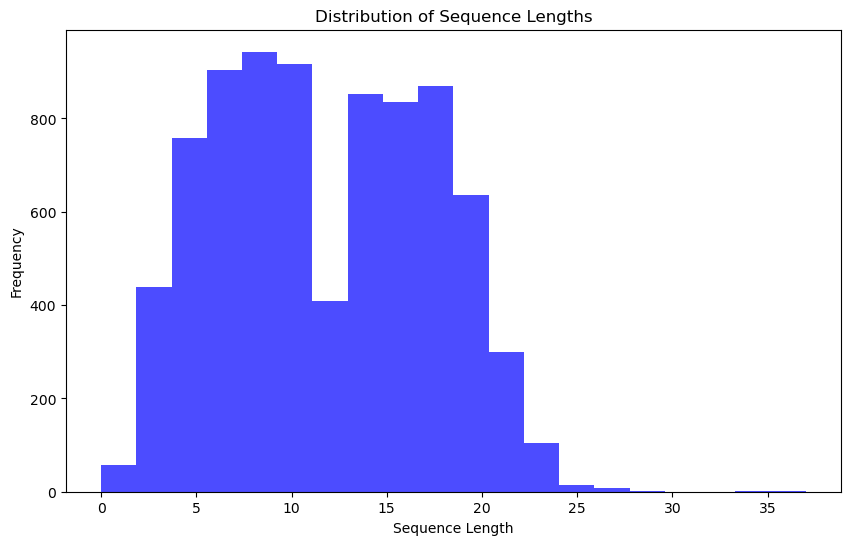

In [36]:
import matplotlib.pyplot as plt

# Calculate sequence lengths for the training data
sequence_lengths = [len(sequence) for sequence in train_sequences]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


In [37]:

MAX_SEQUENCE_LENGTH = 30
# pad dataset to a maximum review length in words
ls_x_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ls_x_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ls_x_train.shape, ls_x_test.shape

((8052, 30), (2013, 30))

## Tockenization of root stemmer

In [38]:
# handle out of vocab words
tokenizer = Tokenizer(oov_token='')
# fit the tokenizer on the documents
tokenizer.fit_on_texts(rs_x_train)
tokenizer.word_index[''] = 0


# showing the words with the max index
word_with_max_idx = max([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])
# showing the words with the min index
word_with_min_idx = min([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])
idx_of_UNK = tokenizer.word_index['']
print(word_with_max_idx, word_with_min_idx, idx_of_UNK)


print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Number of Documents: {tokenizer.document_count}")



train_sequences = tokenizer.texts_to_sequences(rs_x_train)
test_sequences = tokenizer.texts_to_sequences(rs_x_test)


print(train_sequences[0])



('تهج', 8638) ('', 0) 0
Vocabulary size: 8638
Number of Documents: 8052
[362, 462, 397, 3, 74, 363, 20, 1972, 550, 462, 2194, 322, 369, 174, 979, 2532, 105, 514, 221, 216, 397, 633]


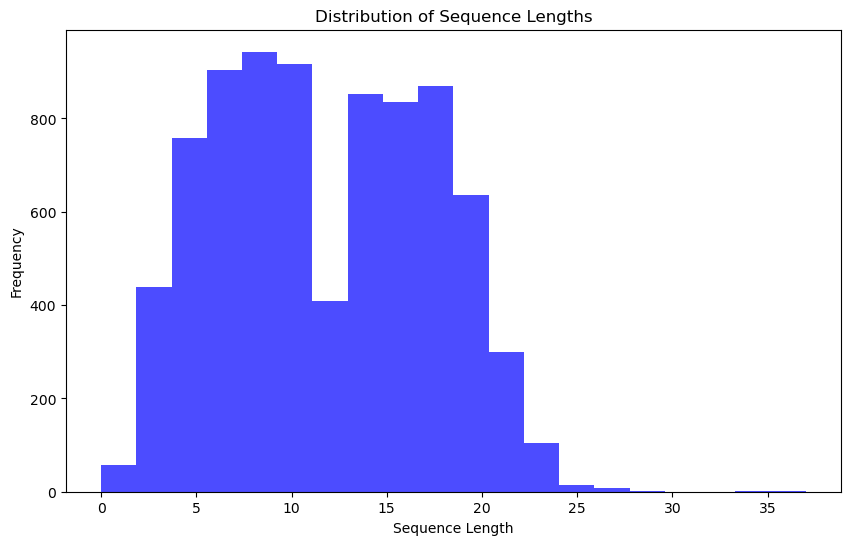

In [40]:
import matplotlib.pyplot as plt

# Calculate sequence lengths for the training data
sequence_lengths = [len(sequence) for sequence in train_sequences]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


In [41]:

MAX_SEQUENCE_LENGTH = 30
# pad dataset to a maximum review length in words
rs_x_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
rs_x_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
rs_x_train.shape, rs_x_test.shape

((8052, 30), (2013, 30))

# Emebdding

In [27]:
!pip install transformers

In [75]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

marbert_model_path = 'UBC-NLP/MARBERT'
tokenizer = AutoTokenizer.from_pretrained(marbert_model_path, from_tf=True)
marbert_model = TFAutoModel.from_pretrained(marbert_model_path, output_hidden_states=True)




All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at UBC-NLP/MARBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [49]:
import numpy as np
from tqdm import tqdm

def bert_tokenize(texts: str) -> list:
    max_len = 0
    for text in texts:
        max_len = max(len(tokenizer.basic_tokenizer.tokenize(text)), max_len)
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len)
    return (tokens['input_ids'], tokens['attention_mask'], tokens['token_type_ids'])
def get_embeddings(token_ids):
    # Convert token IDs to input tensors
    input_ids = tf.convert_to_tensor(token_ids)

    # Get embeddings
    hidden_states = marbert_model(input_ids=input_ids)[2]
    sentence_embd = tf.reduce_mean(tf.reduce_sum(tf.stack(hidden_states[-4:]), axis=0), axis=1)
    return sentence_embd
def get_padded_embeddings(padded_sequences):
    embeddings_list = []

    for seq in tqdm(padded_sequences, desc="Getting embeddings"):
        # Remove padding values (0) from the sequence
        non_zero_tokens = [token for token in seq if token != 0]
        if non_zero_tokens:
            embeddings = get_embeddings([non_zero_tokens])
            embeddings_list.append(embeddings)

    if embeddings_list:
        return np.concatenate(embeddings_list, axis=0)
    else:
        return None

In [76]:
from tqdm import tqdm
def bert_tokenize(texts: str) -> list:
    max_len = 0
    for text in texts:
        max_len = max(len(tokenizer.tokenize(f'[CLS] {text} [SEP]')), max_len)
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len)
    return (tokens['input_ids'], tokens['attention_mask'], tokens['token_type_ids'])

def get_embeddings(tokens):
    ids = tf.convert_to_tensor(tokens[0])
    mask = tf.convert_to_tensor(tokens[1])
    type_ids = tf.convert_to_tensor(tokens[2])
    hidden_states = marbert_model(input_ids=ids, attention_mask=mask, token_type_ids=type_ids)[2]
    sentence_embd = tf.reduce_mean(tf.reduce_sum(tf.stack(hidden_states[-4:]), axis = 0), axis=1)
    return sentence_embd
def get_embeddings_ttt(tweets):

    # Assuming your data is already loaded and `Data['txt'].values` is available
    batch_size=4
    batch_size = tweets.shape[0] // 10
    rem = tweets.shape[0] % 10
    start_batch_idx = 0  # Set this variable to the desired starting batch index

    for batch_idx in range(start_batch_idx, 10):
        if batch_idx < 9:
            batch_data = tweets[batch_idx * batch_size : (batch_idx + 1) * batch_size]
        else:
            batch_data = tweets[batch_idx * batch_size :]

        x_batch = np.empty(shape=(batch_data.shape[0], 768), dtype=np.float64)

        for i, text in enumerate(tqdm(batch_data, desc=f'Processing batch {batch_idx+1}..')):
            tokens = bert_tokenize([text])
            x_batch[i] = get_embeddings(tokens)

        np.save(f'batch_features_{batch_idx}.npy', x_batch)
        print(f'Batch {batch_idx+1} features saved.')

    print("All batches processed and saved.")
    all_batches = []

    start_batch_idx = 0

    for batch_idx in range(start_batch_idx, 10):
        batch_file_path = f'batch_features_{batch_idx}.npy'
        batch_features = np.load(batch_file_path)
        all_batches.append(batch_features)

    # Concatenate all the batches along the first axis (axis=0)
    embds = np.concatenate(all_batches, axis=0)
    return embds

## Emebdding of light stemmer

In [77]:
# Get embeddings for padded training sequences
ls_train_embeddings = get_embeddings_ttt(df_train["Light Stemming"].values)

# Get embeddings for padded test sequences
ls_test_embeddings = get_embeddings_ttt(df_test["Light Stemming"].values)

Processing batch 1..: 100%|██████████| 805/805 [02:46<00:00,  4.83it/s]


Batch 1 features saved.


Processing batch 2..: 100%|██████████| 805/805 [02:46<00:00,  4.83it/s]


Batch 2 features saved.


Processing batch 3..: 100%|██████████| 805/805 [02:48<00:00,  4.79it/s]


Batch 3 features saved.


Processing batch 4..: 100%|██████████| 805/805 [02:46<00:00,  4.83it/s]


Batch 4 features saved.


Processing batch 5..: 100%|██████████| 805/805 [02:46<00:00,  4.82it/s]


Batch 5 features saved.


Processing batch 6..: 100%|██████████| 805/805 [02:47<00:00,  4.82it/s]


Batch 6 features saved.


Processing batch 7..: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]


Batch 7 features saved.


Processing batch 8..: 100%|██████████| 805/805 [02:45<00:00,  4.85it/s]


Batch 8 features saved.


Processing batch 9..: 100%|██████████| 805/805 [02:46<00:00,  4.84it/s]


Batch 9 features saved.


Processing batch 10..: 100%|██████████| 807/807 [02:48<00:00,  4.80it/s]


Batch 10 features saved.
All batches processed and saved.


Processing batch 1..: 100%|██████████| 201/201 [00:41<00:00,  4.86it/s]


Batch 1 features saved.


Processing batch 2..: 100%|██████████| 201/201 [00:41<00:00,  4.85it/s]


Batch 2 features saved.


Processing batch 3..: 100%|██████████| 201/201 [00:41<00:00,  4.79it/s]


Batch 3 features saved.


Processing batch 4..: 100%|██████████| 201/201 [00:41<00:00,  4.84it/s]


Batch 4 features saved.


Processing batch 5..: 100%|██████████| 201/201 [00:41<00:00,  4.79it/s]


Batch 5 features saved.


Processing batch 6..: 100%|██████████| 201/201 [00:42<00:00,  4.77it/s]


Batch 6 features saved.


Processing batch 7..: 100%|██████████| 201/201 [00:41<00:00,  4.86it/s]


Batch 7 features saved.


Processing batch 8..: 100%|██████████| 201/201 [00:41<00:00,  4.83it/s]


Batch 8 features saved.


Processing batch 9..: 100%|██████████| 201/201 [00:41<00:00,  4.79it/s]


Batch 9 features saved.


Processing batch 10..: 100%|██████████| 204/204 [00:42<00:00,  4.85it/s]

Batch 10 features saved.
All batches processed and saved.


## Emebdding of root stemmer

In [ ]:
# Get embeddings for padded training sequences
rs_train_embeddings = get_embeddings_ttt(df_train["Root Stemming"].values)

# Get embeddings for padded test sequences
rs_test_embeddings = get_embeddings_ttt(df_test["Root Stemming"].values)

In [54]:
def zero_len(padded_sequences):
    zero_length_indices =[]
    for idx, seq in enumerate(tqdm(padded_sequences, desc="Getting embeddings")):
            # Remove padding values (0) from the sequence
            non_zero_tokens = [token for token in seq if token != 0]
            if not non_zero_tokens:     
                zero_length_indices.append(idx)
    return  zero_length_indices               

In [55]:
train_z_i = zero_len(rs_x_train)
test_z_i = zero_len(rs_x_test)
print(train_z_i)
print(test_z_i)

Getting embeddings: 100%|██████████| 2013/2013 [00:00<00:00, 11802.92it/s]

[240, 1199, 1939, 2462, 2479, 3819, 4536, 4642, 6589, 7127, 7605]
[272, 662, 893, 1645, 1940]


In [4]:
import pickle

with open('/kaggle/input/embeddings/rs_train_embeddings.pkl', 'rb') as f:
    rs_train_embeddings = pickle.load(f)

with open('/kaggle/input/embeddings/rs_test_embeddings.pkl', 'rb') as f:
    rs_test_embeddings = pickle.load(f)


In [14]:
with open('/kaggle/working/train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('/kaggle/working/test.pkl', 'rb') as f:
    df_t = pickle.load(f)


In [79]:
df_train.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Light Stemming,Root Stemming
1426,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,1,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,شايف الحمار انه احتياط الموسم الماضي اليوفي اد...,شايف حمار انه احتياط موسم ماضي يوفي اداره ريال...,شيف حمر انه حيط وسم اضي يوف دره ريل امر غرب هج...
496,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,1,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,هزق البلد مرتضي محدش عارف يوقفه لا وزير داخليه...,هزق بلد مرتضي محدش عارف يوقفه لا وزير داخليه ش...,هزق بلد رضي حدش عرف وقف لا وزر دخل شبب حتي بتع...
3464,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,0,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,استفتاء تنتهي الاوليمبياد وتعود بعثتنا بالسلام...,استفتاء تنتهي اوليمبياد وتعود بعثت سلامه ميدال...,فاء نهي اوليمبياد تعد بعث سلم يدل حصل وجه نظر
7073,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,1,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول الجغ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول جغرا...,لا وجد خرج نفط دعش سوي تركياهكذا تقل جغراف سؤل...
758,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,7,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي سياره عادي اتوتر طول ما ...,ما احب ركب جهل عاي سير عدي وتر طول ما انا اسق ...


In [80]:
df_test.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Light Stemming,Root Stemming
3518,rm: اينما وليت وجهك : ستجدني ؛ انا داخلك..! غ...,4,rm: اينما وليت وجهك : ستجدني ؛ انا داخلك..! غ...,اينما وجهك ستجدني انا داخلك غرام,اين وجهك ستجد انا داخلك غرام,اين وجه تجد انا دخل غرم
1453,: انا خايف يطلع القدر بالشحته وضاحكين عليا,7,: انا خايف يطلع القدر بالشحته وضاحكين عليا,انا خايف يطلع القدر بالشحته وضاحكين عليا,انا خايف يطلع قدر شحته وضاحك عليا,انا خيف طلع قدر شحت وضح علا
9002,ملخص الاوليمبياد: • كان التوانسه تلاهاو باي وا...,0,ملخص الاوليمبياد: • كان التوانسه تلاهاو باي وا...,ملخص الاوليمبياد التوانسه تلاهاو باي واحد مشي ...,ملخص اوليمبياد توانسه تلاهاو باي واحد مشي متبع...,لخص اوليمبياد ونس اهو باي وحد مشي بعوش مسمعوش ...
2692,دايما معاه و روحنا فداه.,2,دايما معاه و روحنا فداه.,دايما معاه روحنا فداه,داي معاه روح فداه,داي عاه روح فده
33,الدعاء لاهلنا ب حلب فهم بحاجه له فهم يتعرضون ...,5,الدعاء لاهلنا ب حلب فهم بحاجه له فهم يتعرضون ...,الدعاء لاهلنا حلب بحاجه يتعرضون لقصف شرس نسال ...,دعاء لاهل حلب بحاجه يتعرض لقصف شرس نسال الله ا...,دعء لهل حلب بحج عرض قصف شرس نسل الل ان حفظ عشر...


In [19]:
with open('/kaggle/working/ls_train_embeddings.pkl', 'rb') as f:
    ls_train_embeddings = pickle.load(f)

with open('/kaggle/working/ls_test_embeddings.pkl', 'rb') as f:
    ls_test_embeddings = pickle.load(f)

In [20]:
ls_train_embeddings.shape,ls_test_embeddings.shape

((8052, 768), (2013, 768))

In [5]:
rs_train_embeddings.shape,rs_test_embeddings.shape

((8041, 768), (2008, 768))

In [6]:
import numpy as np

# Indices where you want to insert empty arrays
empty_indices_train = [240, 1199, 1939, 2462, 2479, 3819, 4536, 4642, 6589, 7127, 7605]
empty_indices_test = [272, 662, 893, 1645, 1940]

# Insert empty arrays at specified indices for train embeddings
for index in empty_indices_train:
    empty_array = np.empty(shape=(1, 768), dtype=np.float64)
    rs_train_embeddings = np.insert(rs_train_embeddings, index, empty_array, axis=0)

# Insert empty arrays at specified indices for test embeddings
for index in empty_indices_test:
    empty_array = np.empty(shape=(1, 768), dtype=np.float64)
    rs_test_embeddings = np.insert(rs_test_embeddings, index, empty_array, axis=0)

# Verify the shapes after insertion
print(rs_train_embeddings.shape, rs_test_embeddings.shape)


(8052, 768) (2013, 768)


In [9]:
!pip install gdown

In [12]:
!gdown --id 1Fs0PTy_xPsoX5bg4QTCrX6JAaQCHRzis

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Fs0PTy_xPsoX5bg4QTCrX6JAaQCHRzis
To: /kaggle/working/train.pkl
100%|███████████████████████████████████████| 4.22M/4.22M [00:00<00:00, 189MB/s]


In [13]:
!gdown --id 1JLa-ELhUskQINi0syf3YJWBX8jcCXdn4

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLa-ELhUskQINi0syf3YJWBX8jcCXdn4
To: /kaggle/working/test.pkl
100%|███████████████████████████████████████| 1.05M/1.05M [00:00<00:00, 109MB/s]


In [17]:
!gdown -1qtKOid9F-WGMnk5SHywqGEC48o6VAh7A

Downloading...
From: https://drive.google.com/uc?id=1qtKOid9F-WGMnk5SHywqGEC48o6VAh7A
To: /kaggle/working/ls_train_embeddings.pkl
100%|██████████████████████████████████████| 49.5M/49.5M [00:01<00:00, 43.7MB/s]


In [18]:
!gdown 1j_aI3rr1W5wp5VmZRll6VHBXHPxprkAp

Downloading...
From: https://drive.google.com/uc?id=1j_aI3rr1W5wp5VmZRll6VHBXHPxprkAp
To: /kaggle/working/ls_test_embeddings.pkl
100%|██████████████████████████████████████| 12.4M/12.4M [00:00<00:00, 43.4MB/s]


In [7]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
X_train_gru_global = rs_train_embeddings.reshape(rs_train_embeddings.shape[0], 1, rs_train_embeddings.shape[1]) # reshape input to allow for GRU

# Create the GRU model
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier = Sequential()
gru_classifier.add(GRU(256, input_shape=(X_train_gru_global.shape[1], X_train_gru_global.shape[2]), return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(128, return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(64))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(Dense(8, activation='softmax'))

# Compile the model
gru_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## train and evalute Gru

gru_classifier.fit(X_train_gru_global,to_categorical(df_train['label'], num_classes=8) , epochs=20,batch_size=128)

X_test_gru_global = rs_test_embeddings.reshape(rs_test_embeddings.shape[0], 1, rs_test_embeddings.shape[1])

y_pred_gru = gru_classifier.predict(X_test_gru_global)

y_pred_classes = np.argmax(y_pred_gru, axis=1)

print("GRU",classification_report(df_test['label'], y_pred_classes))

In [87]:
X_train_gru_global = ls_train_embeddings.reshape(ls_train_embeddings.shape[0], 1, ls_train_embeddings.shape[1]) # reshape input to allow for GRU

# Create the GRU model
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier = Sequential()
gru_classifier.add(GRU(256, input_shape=(X_train_gru_global.shape[1], X_train_gru_global.shape[2]), return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(128, return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(64))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(Dense(8, activation='softmax'))

# Compile the model
gru_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## train and evalute Gru

gru_classifier.fit(X_train_gru_global,to_categorical(df_train['label'], num_classes=8) , epochs=20,batch_size=128)

X_test_gru_global = ls_test_embeddings.reshape(ls_test_embeddings.shape[0], 1, ls_test_embeddings.shape[1])

y_pred_gru = gru_classifier.predict(X_test_gru_global)

y_pred_classes = np.argmax(y_pred_gru, axis=1)

print("GRU",classification_report(df_test['label'], y_pred_classes))

Epoch 1/20
63/63 [==============================] - 7s 8ms/step - loss: 0.3572 - accuracy: 0.3648
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 0.6623
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 0.1881 - accuracy: 0.7160
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1696 - accuracy: 0.7462
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 0.1572 - accuracy: 0.7655
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.7837
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.1328 - accuracy: 0.8055
Epoch 8/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1246 - accuracy: 0.8219
Epoch 9/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1164 - accuracy: 0.8343
Epoch 10/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.8517
Epoch 11/20
63/63 [

# Saving data



In [47]:
import pickle
with open('Data.pkl', 'wb') as f:
    pickle.dump(Data, f)


In [72]:

with open('train.pkl', 'wb') as f:
    pickle.dump(df_train, f)

with open('test.pkl', 'wb') as f:
    pickle.dump(df_test, f)


In [ ]:
with open('rs_x_train_tks.pkl', 'wb') as f:
    pickle.dump(rs_x_train, f)

with open('rs_x_test_tks.pkl', 'wb') as f:
    pickle.dump(rs_x_test, f)

with open('ls_x_train_tks.pkl', 'wb') as f:
    pickle.dump(ls_x_train, f)

with open('ls_x_test_tks.pkl', 'wb') as f:
    pickle.dump(ls_x_test, f)


In [31]:
with open('rs_train_embeddings.pkl', 'wb') as f:
    pickle.dump(rs_train_embeddings, f)

with open('rs_test_embeddings.pkl', 'wb') as f:
    pickle.dump(rs_test_embeddings, f)

In [81]:


with open('ls_train_embeddings.pkl', 'wb') as f:
    pickle.dump(ls_train_embeddings, f)

with open('ls_test_embeddings.pkl', 'wb') as f:
    pickle.dump(ls_test_embeddings, f)
